# Data Mining Week 7 Class Practice
# Rayna Shera Chang / 0706022310022

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [93]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [95]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The dataset consists of 200 customer records and five variables, namely CustomerID, Gender, Age, Annual Income, and Spending Score (1–100). Each entry represents an individual customer with no missing values, indicating a clean and complete dataset suitable for analysis. The customers’ ages range from 18 to 70 years, with an average age of around 39, suggesting that the mall serves a broad demographic spanning young adults to older individuals, though most fall within their late 30s and early 40s. The annual income varies widely from \$15,000 to $137,000, with an average of about \$60,600, reflecting a diverse mix of customers from lower to high-income groups. Meanwhile, the spending score ranges from 1 to 99, with a mean of roughly 50, showing that customer spending habits differ significantly, some being conservative spenders while others are highly active and engaged shoppers. This diversity in both income and spending behavior makes the dataset well suited for segmentation analysis such as K-Means clustering to identify distinct customer groups based on their purchasing capacity and spending patterns.


# Data Visualization

In [96]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Spending Score (1-100)',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Annual Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

The 3D scatter plot of Age, Annual Income, and Spending Score illustrates the overall distribution and relationships among the three key customer attributes. From the visualization, it is evident that customers with similar annual incomes exhibit a wide range of spending scores, indicating that income level alone does not directly determine spending behavior. Younger customers, particularly those in their 20s and early 30s, tend to show higher spending scores, suggesting greater engagement and willingness to spend compared to older age groups. Meanwhile, customers with higher incomes are spread across different spending levels, highlighting the presence of both high-income conservative spenders and high-income frequent shoppers. Overall, the plot reveals distinct behavioral clusters across age and income levels, suggesting that customer segmentation based on these variables is appropriate for identifying meaningful market groups.

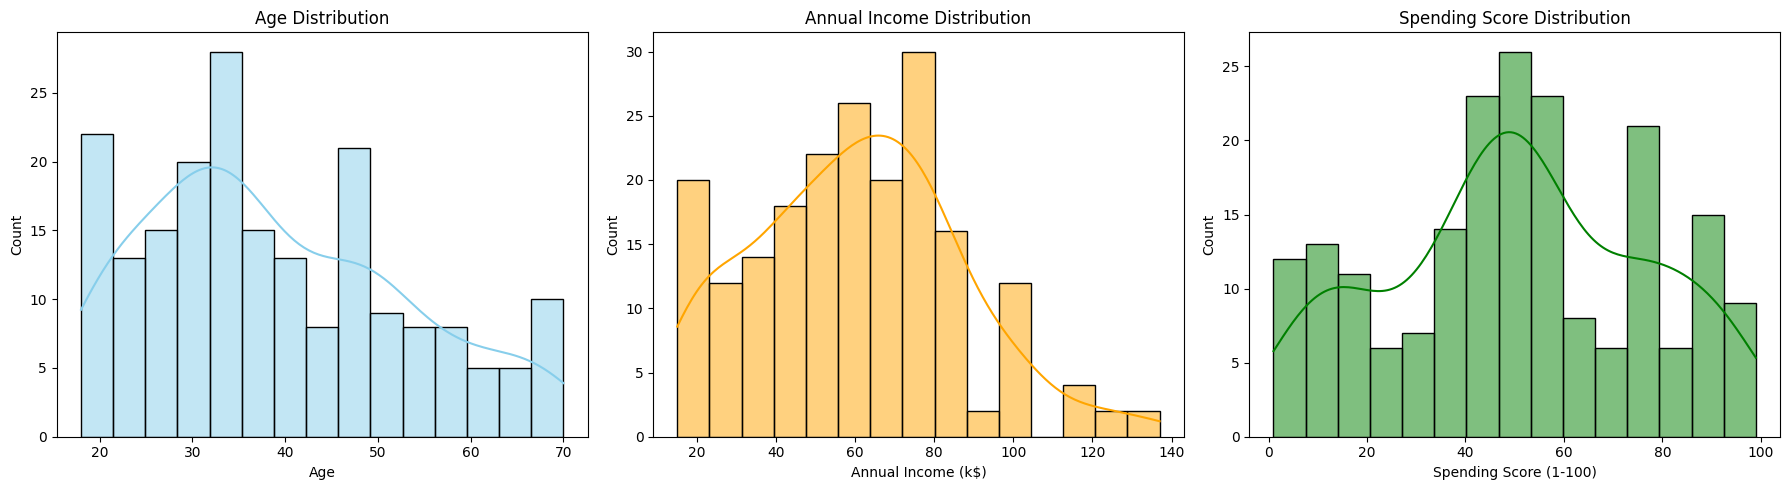

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], bins=15, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["Annual Income (k$)"], bins=15, kde=True, color="orange", ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df["Spending Score (1-100)"], bins=15, kde=True, color="green", ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.tight_layout()
plt.show()

The histogram plots show the distribution patterns of age, annual income, and spending score among mall customers. The age distribution is moderately spread, with most customers concentrated between 25 and 40 years old, indicating that the mall primarily attracts young to middle-aged adults. The annual income distribution forms a near-normal shape centered around \$60,000 to $80,000, suggesting that most customers belong to a mid-income group, with fewer individuals at the very low or very high ends of the income scale. Meanwhile, the spending score distribution displays a bimodal pattern, meaning there are two distinct groups of customers—one with low spending scores and another with high spending scores. This variation indicates that while some customers are cautious or infrequent spenders, others are highly engaged and make frequent or larger purchases. Overall, the distributions highlight the diversity of the customer base and suggest the potential presence of distinct market segments suitable for clustering analysis.

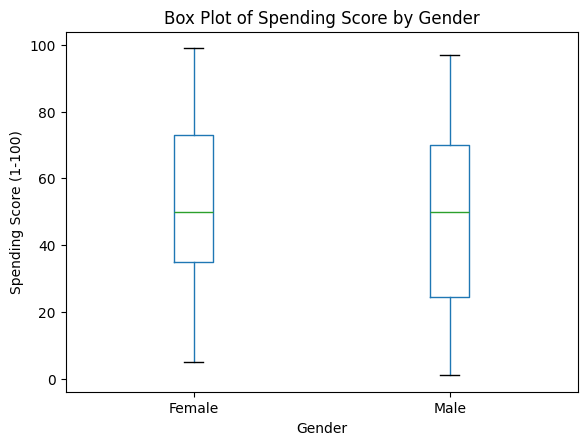

In [98]:
import matplotlib.pyplot as pltz
df.boxplot(column='Spending Score (1-100)', by='Gender', grid=False)
plt.suptitle('')
plt.title("Box Plot of Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

The box plot of spending scores by gender shows that both male and female customers have a wide and similar range of spending behavior, with spending scores distributed almost evenly across the scale from low to high. The median spending score for females appears slightly higher than that of males, suggesting that, on average, female customers may spend a bit more or engage more actively in mall purchases. However, the overlap between the two distributions indicates that gender alone does not strongly determine spending behavior, as both groups contain customers who spend both conservatively and heavily. This pattern implies that other factors, such as income or age, may play a more significant role in influencing customer spending levels.

# Data Preprocessing

In [99]:
from sklearn.preprocessing import OneHotEncoder

one_hot_map = {'Gender': {'Male': 0, 'Female': 1}}

for col, mapping in one_hot_map.items():
    df[col] = df[col].map(mapping)

In [100]:
# create new dataframe
df = df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# Data Scaling

In [101]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

# Separate numeric columns (exclude Gender)
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

sc = StandardScaler()

scaled_features = sc.fit_transform(df[num_cols])
# Create scaled dataframe
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)

# Add Gender back (unscaled)
df_sc_scaled['Gender'] = df['Gender'].values

df_sc_scaled.head()

# visualization
import plotly.express as px
fig = px.scatter_3d(
    df_sc_scaled,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Spending Score (1-100)',  # opsional: warnai berdasarkan Spending Score
    color_continuous_scale='Blues',
    opacity=0.7,
    title='3D Visualization of Scaled Data (Age, Income, Spending Score)',
    labels={
        'Age': 'Scaled Age',
        'Annual Income': 'Scaled Annual Income',
        'Spending Score': 'Scaled Spending Score'
    }
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='darkblue')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False),
))

fig.show()

Scaling is needed for distance-based methods because these algorithms rely on measuring the distance between data points to determine similarity, and features with larger numerical ranges can dominate that distance calculation. For example, in a dataset with *Age* (ranging from 18 to 70) and *Annual Income* (ranging from \$15,000 to $137,000), the income values are much larger in scale. Without scaling, the algorithm would give far more weight to income than to age when computing distances, even if both features are equally important. By standardizing or normalizing the data, all features are placed on the same scale, allowing the algorithm to treat each variable fairly and accurately identify true patterns or clusters. This is especially important for methods such as K-Means, K-Nearest Neighbors (KNN), and Principal Component Analysis (PCA), which all depend on distance or variance calculations.


# K-Means Clustering

In [102]:
from sklearn.cluster import KMeans

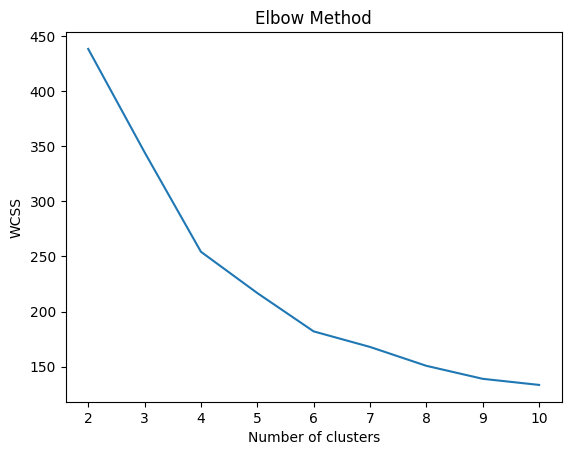

In [103]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [104]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  438.522412
1                   3  344.684940
2                   4  254.282907
3                   5  216.784902
4                   6  181.951436
5                   7  167.821344
6                   8  150.664747
7                   9  138.862796
8                  10  133.326640


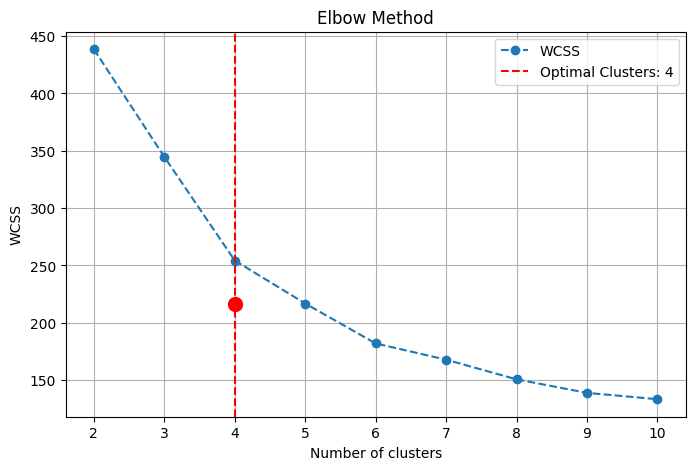

The optimal number of clusters is: 4


In [105]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Based on the Elbow Method visualization and the WCSS values, the optimal number of clusters is determined to be **four (K=4)**. The graph shows a sharp decline in WCSS from two to four clusters, after which the rate of decrease becomes more gradual, indicating diminishing returns in clustering performance beyond this point. At K=4, the within-cluster variation is significantly reduced compared to smaller K values, while maintaining model simplicity and interpretability. Therefore, selecting four clusters provides a balanced segmentation that effectively captures the main differences in customer profiles without overfitting the data.

In [106]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2


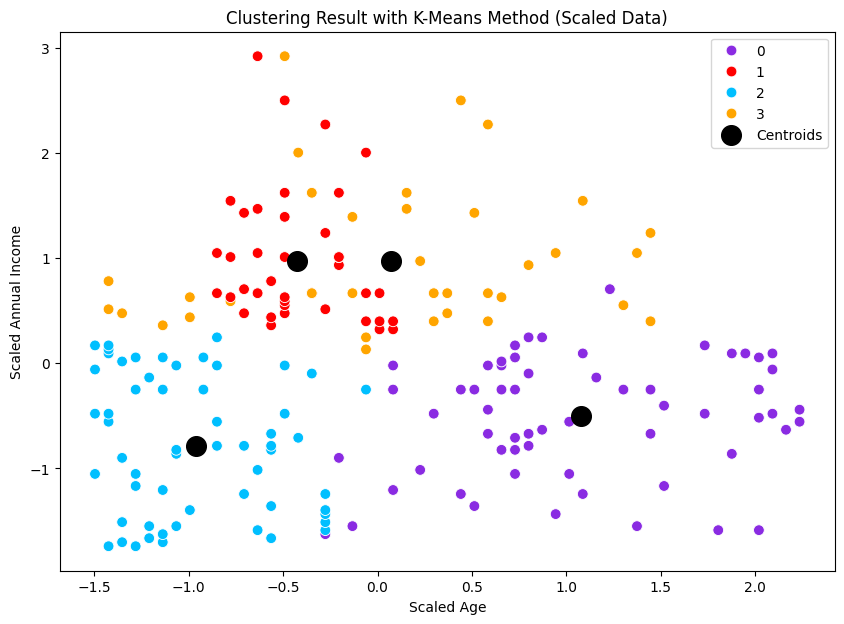

In [107]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income (k$)", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "orange"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

The scatter plot shows the clustering result using the K-Means method on scaled data, visualizing how customers are grouped based on their age and annual income. The plot reveals four distinct clusters, each representing customers with similar demographic and financial characteristics. The centroids (black dots) mark the average position of each cluster, showing that one group consists of younger customers with lower income, while another includes older customers with moderate income. There is also a visible cluster of younger individuals with higher income, as well as a separate group with mixed ages but relatively higher income levels. The clear separation between these clusters indicates that scaling effectively balanced the feature ranges, allowing K-Means to form meaningful customer segments based on both age and income without one variable overpowering the other.

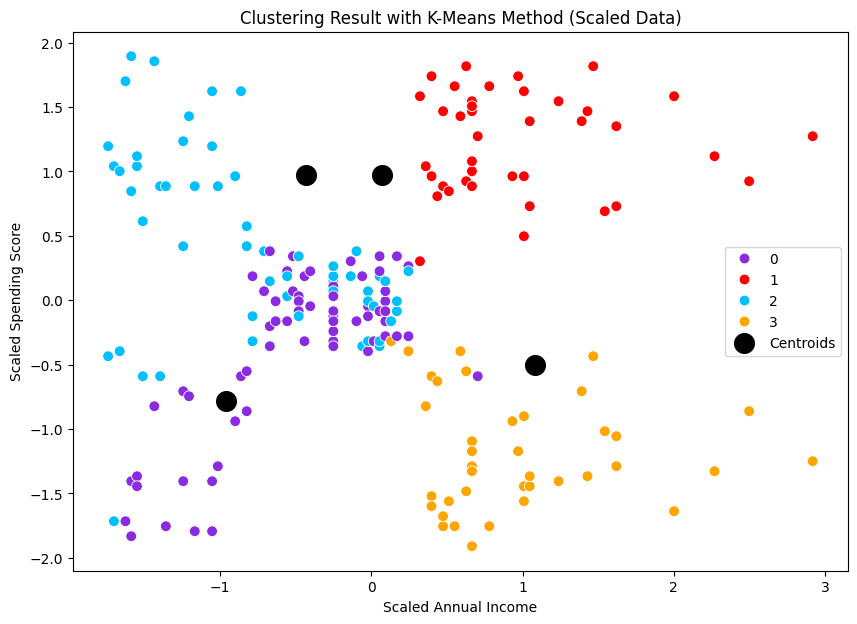

In [108]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "orange"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

The clustering result using scaled annual income and spending score shows four distinct customer segments that differ in both purchasing power and spending behavior. Customers in the top-left cluster represent individuals with lower income but relatively high spending scores, suggesting they are enthusiastic or impulsive shoppers despite limited earnings. The top-right cluster includes high-income customers with high spending scores, likely representing the mall’s most profitable and loyal segment. The bottom-right cluster contains high-income individuals with low spending scores, indicating a group that is financially capable but cautious or less engaged in mall purchases. Lastly, the bottom-left cluster includes customers with both low income and low spending scores, representing budget-conscious or less active shoppers. The clear separation of clusters demonstrates how K-Means effectively distinguishes customer groups based on their financial capacity and spending patterns.

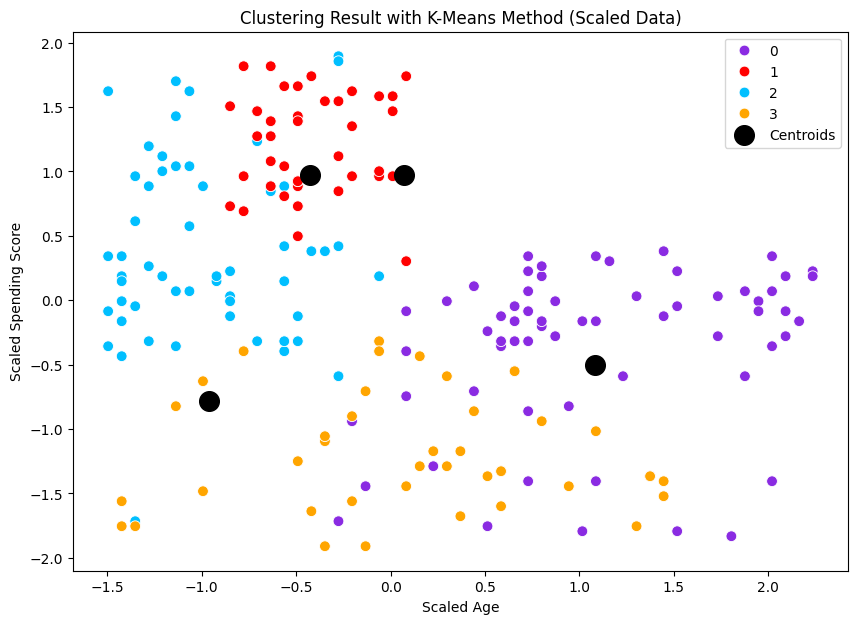

In [109]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Spending Score (1-100)", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "orange"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

The clustering visualization using scaled age and spending score reveals four well-defined customer groups, highlighting how spending habits vary across different age ranges. The upper-left cluster includes younger customers with higher spending scores, indicating a group that is more active and likely enjoys shopping or social experiences at the mall. The upper-middle cluster also contains relatively young to middle-aged individuals who maintain strong purchasing activity. In contrast, the bottom-right cluster represents older customers with lower spending scores, suggesting more conservative spending behavior, possibly due to different financial priorities or lifestyle preferences. The bottom-middle cluster includes customers of varied ages with moderate spending patterns, reflecting balanced and practical shoppers. Overall, the plot shows a clear inverse relationship between age and spending tendency, where younger consumers tend to spend more, while older customers are generally more restrained.

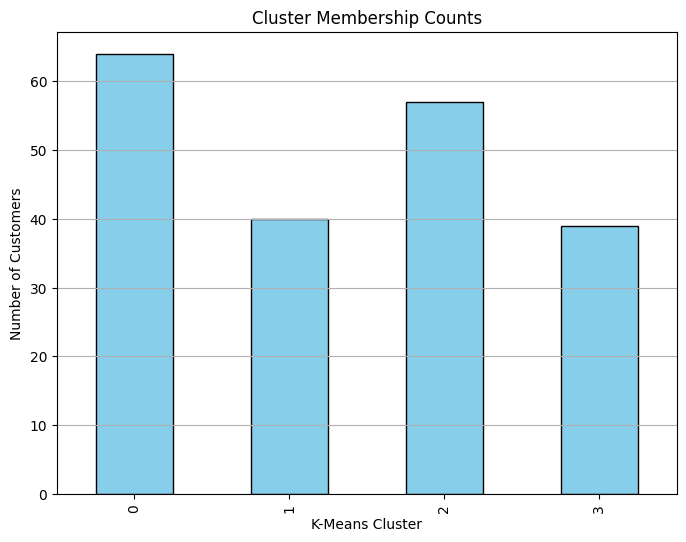

In [110]:
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

The bar chart of cluster membership counts shows the distribution of customers across the four clusters identified by the K-Means algorithm. Cluster 0 has the largest number of customers, with around 64 members, indicating that this segment represents the most common customer profile in the dataset. Clusters 1 and 3 have smaller populations, around 40 members each, suggesting that these groups represent more specific or niche customer behaviors. Cluster 2 also holds a significant portion, with approximately 57 customers, showing another major segment within the customer base. The fairly balanced cluster sizes indicate that the segmentation effectively captures diverse customer groups without strong dominance by a single cluster, allowing for meaningful comparison and tailored marketing strategies for each segment.

In [111]:
# Group the data by cluster
cluster_summary = df.groupby(clusters).agg({
    'Gender': lambda x: x.mode()[0],
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})

# Rename the index
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Rename <lambda> to 'mode'
cluster_summary.columns = cluster_summary.columns.set_levels(
    ['mode' if lvl == '<lambda>' else lvl for lvl in cluster_summary.columns.levels[1]],
    level=1
)

cluster_summary

Gender        Age         Annual Income (k$)           \
                 mode       mean min max               mean min  max   
KMeans_Cluster                                                         
0                   1  53.906250  35  70          47.343750  18   79   
1                   1  32.875000  27  40          86.100000  69  137   
2                   1  25.438596  18  38          40.000000  15   67   
3                   0  39.871795  19  59          86.102564  64  137   

               Spending Score (1-100)          
                                 mean min max  
KMeans_Cluster                                 
0                           40.421875   3  60  
1                           81.525000  58  97  
2                           60.298246   6  99  
3                           19.358974   1  42

# Managerial Implications Based on the Four Clusters

**Cluster 0 – Older Low-Income Shoppers (Female-Dominated)**

Profile:
*   Mostly female customers (Gender mode = 1).
*   Average age around 54 years, ranging from 35 to 70.
*   Low income (\~$47k) and low spending score (~40).
*   Likely conservative buyers focused on essentials and value.

Implications:


*   Targeting: Position as a value-conscious segment; promote discounts and loyalty programs.
*   Channels: Use traditional media and in-store promotions for engagement.
*   Offers: Provide bundle deals or price-based incentives.
*   Retention: Reward long-term loyalty and highlight affordability and quality.

**Cluster 1 – Young High-Income, High-Spending Professionals (Female-Dominated)**

Profile:
*   Mostly female, average age around 33 years.
*   High income (\~$86k) and very high spending score (~82).
*   Likely young professionals or entrepreneurs with strong purchasing power.

Implications:


*   Targeting: Treat as premium/high-value customers.
*   Channels: Focus on digital marketing (social media, influencer collaborations).
*   Offers: Promote exclusive collections, VIP perks, and personalized experiences.
*   Retention: Build loyalty programs with tiered rewards and early access privileges.

**Cluster 2 – Young Low-Income, Mid-Spending Shoppers (Female-Dominated)**

Profile:
*   Predominantly female, average age around 25 years.
*   Low income (\~$40k) but moderate spending (~60).
*   Represents young adults, likely students or early-career workers.

Implications:
*   Targeting: Focus on value-for-money products with appealing designs.
*   Channels: Use social media ads (Instagram, TikTok) with student promotions.
*   Offers: Highlight discounts, limited-time sales, and affordable bundles.
*   Retention: Encourage app engagement, gamified loyalty points, or referral programs.

**Cluster 3 – Mid-Age High-Income, Low-Spending Males**

Profile:
*   Mostly male.
*   Average age around 40 years, ranging from 19 to 59.
*   High income (\~$86k) but low spending (~19).
*   Likely busy professionals or family-oriented customers with low mall engagement.

Implications:
*   Targeting: Encourage spending through convenience and personalization.
*   Channels: Email campaigns, corporate partnerships, and targeted remarketing.
*   Offers: Provide premium loyalty rewards, “buy-more-save-more” bundles, or time-saving services.
*   Retention: Focus on convenience-based perks such as express checkout, home delivery, or member-exclusive privileges.